<h1><center>Movie Recommendation System</center></h1>

**Introduction:**

- This project involves building a movie recommendation system based on a dataset that includes movies, ratings, tags, and links to external movie databases. Using data collected from MovieLens, we developed a content-based recommendation system that identifies similar movies based on genres, release year, and user-generated tags. The recommendation model provides users with a list of similar movies ranked by average rating.

**1. Data Collection and Initial Setup The dataset is divided into four files:**

1. links.csv: Contains identifiers that map movies to external databases like IMDb and TMDb.
2. movies.csv: Lists movie titles along with genres.
3. ratings.csv: Contains user ratings for movies.
4. tags.csv: Includes user-generated tags for each movie.

**2. Data Preprocessing**
Each dataset required specific cleaning steps to prepare it for merging and feature engineering:

**Movies Data:**

- Extracted the release year from the title and created a release_year column.
- Reformatted titles in "Title, The" format to "The Title" to standardize names.
- Split genres into lists and extracted primary_genre and secondary_genre for each movie.
- Replaced the | character with spaces in genres to create a more readable format.

**Ratings Data:**

- Converted the timestamp column into a human-readable format.
- Calculated the average rating per movie, rounded to two decimal places, and stored it as average_rating.

**Tags Data:**

- Converted timestamp to a readable format.
- Aggregated tags for each movie, consolidating them into a single string for each movie with unique tags separated by spaces.

**Links Data:**

- Converted missing tmdbId values to <NA>.
- Created URLs for each movie’s identifiers in MovieLens, IMDb, and TMDb, allowing users to access additional information about recommended movies.

**3. Merging Datasets Each cleaned dataset was merged on movieId:**

- Step 1: Merged movies and links datasets.
- Step 2: Merged the result with ratings to include average_rating.
- Step 3: Merged tags data to add consolidated_tags, resulting in a comprehensive dataset with information on each movie's title, release year, genres, average rating, and tags.

**4. Feature Engineering**

A release_decade column was created by rounding each movie’s release year to the nearest decade.
Combined Features: To represent each movie, a combined_features column was created by concatenating primary_genre, genres, release_decade, consolidated_tags, and average_rating.

**5. Model Development**

- The content-based recommendation model was developed using TF-IDF and cosine similarity:

- TF-IDF Vectorization: The combined_features column was vectorized using TF-IDF to transform it into a matrix of features, weighting each term’s importance.
  Cosine Similarity with Nearest Neighbors: The cosine similarity metric was used with the Nearest Neighbors algorithm to identify the 20 most similar movies for a given title. This approach ensures recommendations reflect the similarity of movie features.

**6. Recommendation Function**

The function get_recommendations provides movie recommendations based on the title:

- Checks if the title exists in the dataset.
- Finds movies similar to the given title based on TF-IDF similarity.
- Filters for unique titles, sorts them by average_rating in descending order, and returns the top 10 recommendations.

**7. Evaluation and Improvements Sorting recommendations by average rating ensures that highly-rated movies are prioritized, improving recommendation quality. This approach allows for clear, high-quality recommendations.**

**Example Code and Methodology Sources**

- MovieLens dataset documentation (https://grouplens.org/datasets/movielens/)
- Techniques referenced from: “Movie Recommendation System Based on MovieLens” (https://towardsdatascience.com/movie-recommendation-system-based-on-movielens-ef0df580cd0e)
- “Introduction to Recommender Systems” (https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada)


## pre- configurations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Accessing directory structure
# This section of the code will handle accessing and managing the directory structure


In [2]:
# Movie Dataset Loader and Exporter
# ---------------------------------
# This script is designed to load multiple movie-related CSV files from a specified
# directory, store each file's content as a DataFrame, and export a subset of each file.
# It checks the presence of each CSV file before loading, prints the first few rows
# for quick inspection, and exports the first 20 records of each dataset to new CSV files
# with "_exported" appended to the original filename.
#
# Requirements:
# - Python 
# - pandas library
# - Directory with CSV files for links, movies, ratings, and tags
#
# Usage:
# - Set 'dataset_directory' to the folder containing the CSV files.
# - Run the script to load each file, display the first few rows, and export a
#   subset of records for each dataset as a separate file.
#

import os
import pandas as pd

# Update path to your local directory
dataset_directory = './data'

# Define file names
file_names = ['links.csv', 'movies.csv', 'ratings.csv', 'tags.csv']

# Initialize a dictionary to hold DataFrames
dataframes = {}

# Iterate through each file
for file_name in file_names:
    # Create full path for each file
    csv_file_path = os.path.join(dataset_directory, file_name)
    
    # Check if the file exists
    if not os.path.exists(csv_file_path):
        print(f"File '{csv_file_path}' does not exist.")
    else:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file_path)
        
        # Store the DataFrame in the dictionary with the file name (without .csv) as the key
        dataframes[file_name.replace('.csv', '')] = df
        
        # Display the first 5 rows of the DataFrame
        print(f"First 5 rows of {file_name}:")
        print(df.head())
        
        # Select only the first 20 records
        df_first_20 = df.head(20)
        
        # Export the DataFrame to a new file with "_exported" appended
        # export_path = os.path.join(dataset_directory, file_name.replace('.csv', '_exported.csv'))
        # df_first_20.to_csv(export_path, index=False)
        # print(f"Exported the first 20 records of {file_name} to {export_path}")

# Access individual DataFrames
links_df = dataframes['links']
movies_df = dataframes['movies']
ratings_df = dataframes['ratings']
tags_df = dataframes['tags']


First 5 rows of links.csv:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
First 5 rows of movies.csv:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
First 5 rows of ratings.csv:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3

In [3]:
# This script cleans and standardizes movie data, performing operations such as:
# - Extracting release year from movie titles
# - Standardizing title format and removing year information
# - Reformatting genres into a list and identifying primary/secondary genres
#
# Output:
# - Returns a cleaned DataFrame ready for further analysis.

import re
import pandas as pd

def clean_movie_data(df):
    # Extract release year from title and add as a separate column
    df['release_year'] = df['title'].apply(lambda title: int(re.search(r'\((\d{4})\)', title).group(1)) 
                                           if re.search(r'\((\d{4})\)', title) else pd.NA)
    
    # Remove year from the title column
    df['title'] = df['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
    
    # Fix titles in the format "Title, The" to "The Title"
    df['title'] = df['title'].apply(lambda title: re.sub(r'^(.*),\s(The|A|An)$', r'\2 \1', title) if isinstance(title, str) else title)
    
    # Ensure release_year is a nullable integer type
    df['release_year'] = df['release_year'].astype(pd.Int64Dtype())
    
    # Replace the pipe '|' character with a space in genres
    df['genres'] = df['genres'].str.replace('|', ' ')
    
    # Split genres into a list
    df['genre_list'] = df['genres'].apply(lambda x: x.split() if isinstance(x, str) else [])
    
    # Extract primary and secondary genres
    df['primary_genre'] = df['genre_list'].apply(lambda x: x[-1] if len(x) > 0 else None)
    df['secondary_genre'] = df['genre_list'].apply(lambda x: x[-2] if len(x) > 1 else 'N/A')
    
    # Drop the temporary 'genre_list' column
    df.drop(columns=['genre_list'], inplace=True)
    
    return df

# Clean the movie data using the function
movies_cleaned_df = clean_movie_data(movies_df)

# Display a sample of the cleaned data
print(movies_cleaned_df.head())





   movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                        genres  release_year primary_genre  \
0  Adventure Animation Children Comedy Fantasy          1995       Fantasy   
1                   Adventure Children Fantasy          1995       Fantasy   
2                               Comedy Romance          1995       Romance   
3                         Comedy Drama Romance          1995       Romance   
4                                       Comedy          1995        Comedy   

  secondary_genre  
0          Comedy  
1        Children  
2          Comedy  
3           Drama  
4             N/A  


In [4]:
# Ratings Data Cleaning and Aggregation
# -------------------------------------
# This script cleans and aggregates movie ratings data by:
# - Converting timestamps to datetime format
# - Calculating and formatting the average rating per movie
#
# Output:
# - Returns a DataFrame with average ratings per movie, rounded to two decimal places.

import pandas as pd

# clean and aggregate the ratings data
def clean_ratings_data(df):
    # Convert the 'timestamp' column to a human-readable datetime format (optional step if needed)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    
    # Calculate the average rating per movie and round to two decimal places
    ratings_aggregated_df = df.groupby('movieId', as_index=False)['rating'].mean()
    ratings_aggregated_df.rename(columns={'rating': 'average_rating'}, inplace=True)
    
    # Format average_rating to two decimal places
    ratings_aggregated_df['average_rating'] = ratings_aggregated_df['average_rating'].round(2)
    
    return ratings_aggregated_df

# Apply the cleaning and aggregation function to the ratings dataset
ratings_cleaned_df = clean_ratings_data(ratings_df)

# Display the cleaned and aggregated DataFrame to verify the changes
print(ratings_cleaned_df.head())




   movieId  average_rating
0        1            3.92
1        2            3.43
2        3            3.26
3        4            2.36
4        5            3.07


In [5]:
# Tags Data Cleaning and Aggregation
# ----------------------------------
# This script cleans and consolidates movie tags data by:
# - Converting timestamps to a readable datetime format
# - Aggregating unique tags per movie into a single string
#
# Output:
# - Returns a DataFrame with consolidated tags for each movie.

import pandas as pd

# clean and aggregate tags data
def clean_tags_data(df):
    # Convert the 'timestamp' column to a human-readable datetime format (optional)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    
    # Group by 'movieId' and aggregate tags into a single string, separated by a space
    tags_aggregated_df = df.groupby('movieId', as_index=False).agg({
        'tag': lambda tags: ' '.join(tags.dropna().unique())  # Consolidate unique tags into a single string
    })
    tags_aggregated_df.rename(columns={'tag': 'consolidated_tags'}, inplace=True)
    
    return tags_aggregated_df

# Apply the cleaning and aggregation function to the tags dataset
tags_cleaned_df = clean_tags_data(tags_df)

# Display the cleaned and aggregated DataFrame to verify the changes
print(tags_cleaned_df.head())



   movieId                             consolidated_tags
0        1                                     pixar fun
1        2  fantasy magic board game Robin Williams game
2        3                                     moldy old
3        5                              pregnancy remake
4        7                                        remake


In [6]:
# Handling for missing tmdbId values
def clean_links_data(df):
    # Convert 'tmdbId' to an integer, setting missing values to <NA>
    df['tmdbId'] = df['tmdbId'].apply(lambda x: int(x) if not pd.isna(x) else pd.NA)

    # Create URL columns for each identifier, skip tmdb_url if tmdbId is missing
    df['movielens_url'] = df['movieId'].apply(lambda x: f"https://movielens.org/movies/{x}")
    df['imdb_url'] = df['imdbId'].apply(lambda x: f"http://www.imdb.com/title/tt{int(x):07d}/")
    df['tmdb_url'] = df['tmdbId'].apply(lambda x: f"https://www.themoviedb.org/movie/{x}" if pd.notna(x) else pd.NA)
    
    return df

# Apply the cleaning function to the links dataset
links_cleaned_df = clean_links_data(links_df)

# Display the cleaned DataFrame to verify the changes
links_cleaned_df.head()



,movieId,imdbId,tmdbId,movielens_url,imdb_url,tmdb_url
0,1,114709,862,https://movielens.org/movies/1,http://www.imdb.com/title/tt0114709/,https://www.themoviedb.org/movie/862
1,2,113497,8844,https://movielens.org/movies/2,http://www.imdb.com/title/tt0113497/,https://www.themoviedb.org/movie/8844
2,3,113228,15602,https://movielens.org/movies/3,http://www.imdb.com/title/tt0113228/,https://www.themoviedb.org/movie/15602
3,4,114885,31357,https://movielens.org/movies/4,http://www.imdb.com/title/tt0114885/,https://www.themoviedb.org/movie/31357
4,5,113041,11862,https://movielens.org/movies/5,http://www.imdb.com/title/tt0113041/,https://www.themoviedb.org/movie/11862


In [7]:
# Merge all cleaned datasets on 'movieId'


# Step 1: Merge movies and links data on 'movieId'
movies_links_merged = pd.merge(movies_cleaned_df, links_cleaned_df, on='movieId', how='left')

# Step 2: Merge the above result with ratings on 'movieId'
movies_links_ratings_merged = pd.merge(movies_links_merged, ratings_cleaned_df, on='movieId', how='left')

# Step 3: Merge the result with tags on both 'movieId' and 'userId' (common in ratings and tags)
combined_df = pd.merge(movies_links_ratings_merged, tags_cleaned_df, on=['movieId'], how='left')

# Display the structure of the combined DataFrame to assess if additional transformations are needed
combined_df.head(), combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movieId            9742 non-null   int64  
 1   title              9742 non-null   object 
 2   genres             9742 non-null   object 
 3   release_year       9729 non-null   Int64  
 4   primary_genre      9742 non-null   object 
 5   secondary_genre    9742 non-null   object 
 6   imdbId             9742 non-null   int64  
 7   tmdbId             9734 non-null   object 
 8   movielens_url      9742 non-null   object 
 9   imdb_url           9742 non-null   object 
 10  tmdb_url           9734 non-null   object 
 11  average_rating     9724 non-null   float64
 12  consolidated_tags  1572 non-null   object 
dtypes: Int64(1), float64(1), int64(2), object(9)
memory usage: 999.1+ KB


(   movieId                        title  \
 0        1                    Toy Story   
 1        2                      Jumanji   
 2        3             Grumpier Old Men   
 3        4            Waiting to Exhale   
 4        5  Father of the Bride Part II   
 
                                         genres  release_year primary_genre  \
 0  Adventure Animation Children Comedy Fantasy          1995       Fantasy   
 1                   Adventure Children Fantasy          1995       Fantasy   
 2                               Comedy Romance          1995       Romance   
 3                         Comedy Drama Romance          1995       Romance   
 4                                       Comedy          1995        Comedy   
 
   secondary_genre  imdbId tmdbId                   movielens_url  \
 0          Comedy  114709    862  https://movielens.org/movies/1   
 1        Children  113497   8844  https://movielens.org/movies/2   
 2          Comedy  113228  15602  https://movielen

In [8]:
import os

# Define the export path and file name for the combined DataFrame
export_path = os.path.join(dataset_directory, 'combined_df.csv')

# Export the first 2000 records of combined_df to a new CSV file
combined_df.head(2000).to_csv(export_path, index=False)
print(f"Exported the first 2000 records of combined_df to {export_path}")


Exported the first 2000 records of combined_df to ./data/combined_df.csv


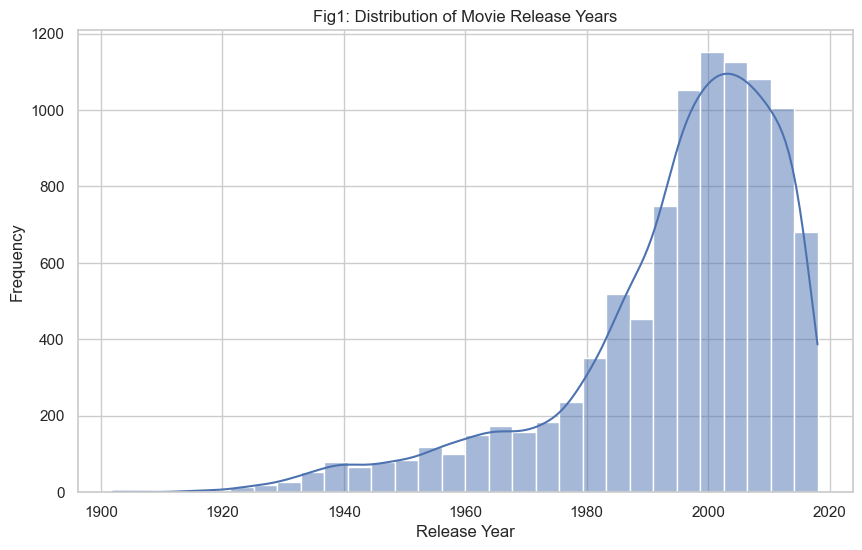

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Purpose: This chart aims to show the distribution of movie release years to understand the frequency of movie releases over time.

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of movie release years
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create a histogram plot to visualize the distribution of movie release years
# The 'dropna()' method is used to exclude missing values, and 'bins=30' specifies the number of bins in the histogram
# The 'kde=True' parameter adds a Kernel Density Estimate (KDE) line to the plot for a smooth distribution curve
sns.histplot(movies_cleaned_df['release_year'].dropna(), bins=30, kde=True)

# Set the title of the plot
plt.title('Fig1: Distribution of Movie Release Years')

# Set the label for the x-axis
plt.xlabel('Release Year')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()

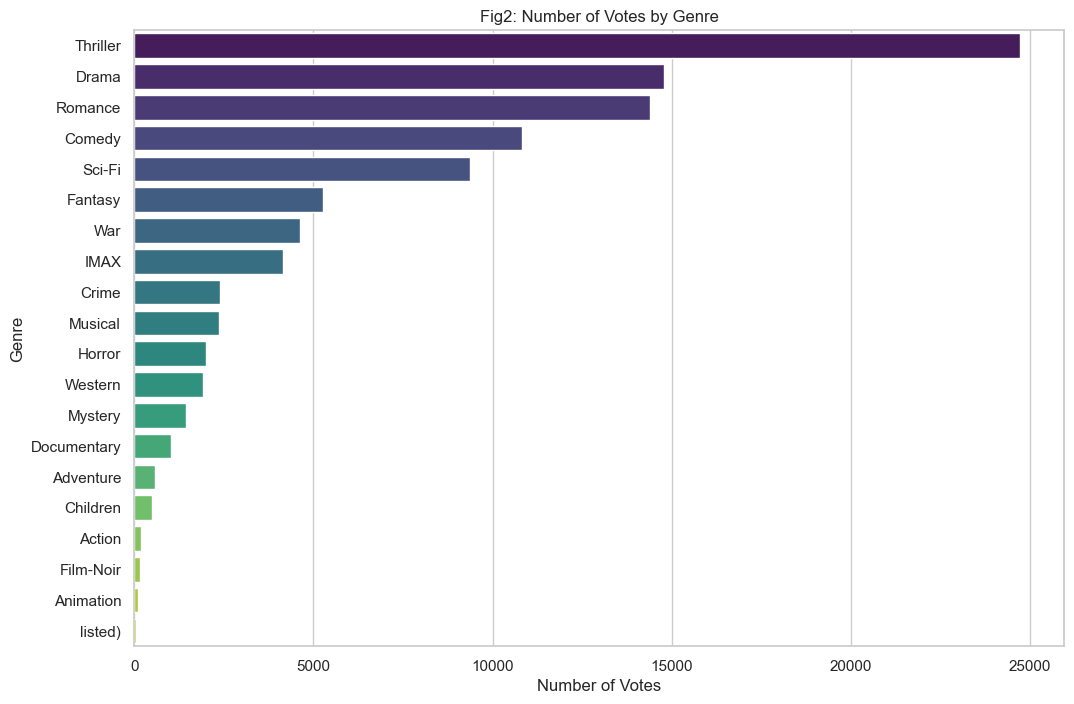

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# movies_cleaned_df, ratings_df

# Purpose: This chart aims to show the number of votes for each genre to understand which genres are most popular among users.

# Merge ratings with movies to get genres
# This step combines the ratings data with the movie data to include genre information for each rating.
ratings_with_genres = pd.merge(ratings_df, movies_cleaned_df[['movieId', 'primary_genre']], on='movieId')

# Count the number of votes by genre
# Group the merged DataFrame by 'primary_genre' and count the number of ratings (votes) for each genre.
votes_by_genre = ratings_with_genres.groupby('primary_genre')['rating'].count().reset_index()
votes_by_genre.columns = ['primary_genre', 'num_votes']

# Sort by number of votes
# Sort the genres by the number of votes in descending order to identify the most popular genres.
votes_by_genre = votes_by_genre.sort_values(by='num_votes', ascending=False)

# Set the style for seaborn
# This sets the visual style of the seaborn plots to 'whitegrid'.
sns.set(style="whitegrid")

# Bar plot of number of votes by genre
# Create a bar plot to visualize the number of votes for each genre.
plt.figure(figsize=(12, 8))
sns.barplot(x='num_votes', y='primary_genre', data=votes_by_genre, hue='primary_genre', palette='viridis', dodge=False, legend=False)
plt.title('Fig2: Number of Votes by Genre')
plt.xlabel('Number of Votes')
plt.ylabel('Genre')
plt.show()

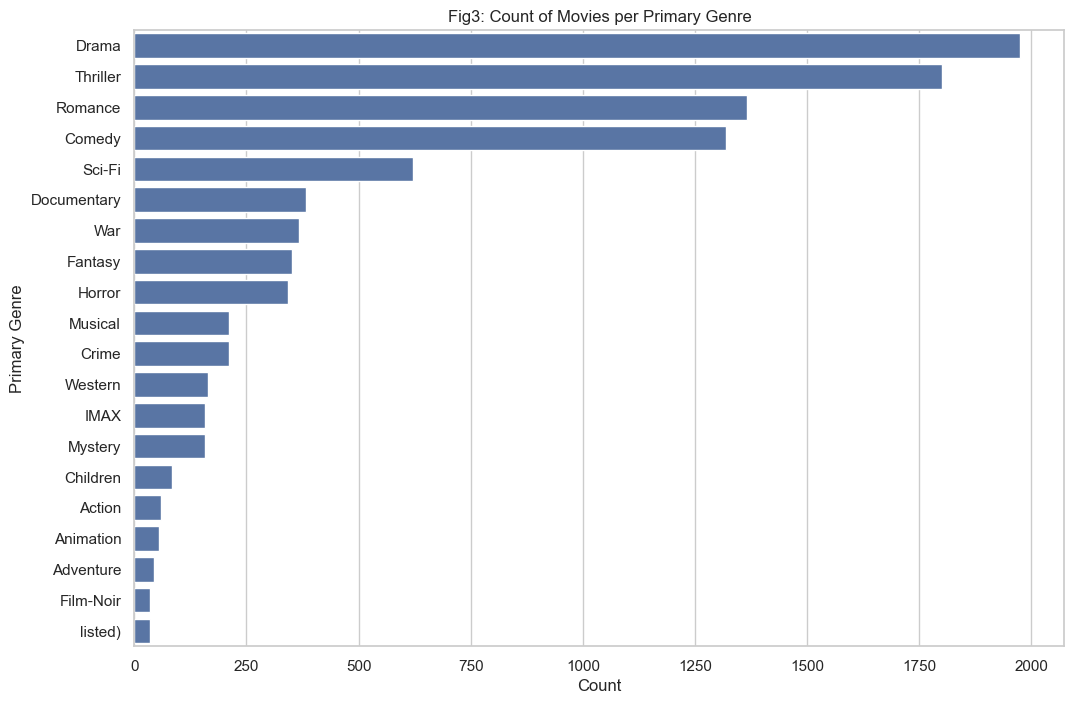

In [11]:

# Purpose: This chart aims to show the count of movies for each primary genre to understand the distribution of movies across different genres.

# Set the style for seaborn
# This sets the visual style of the seaborn plots to 'whitegrid'.
sns.set(style="whitegrid")

# 2. Count of movies per primary genre
# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Create a count plot to visualize the number of movies for each primary genre
# The genres are ordered by their count in descending order
sns.countplot(y='primary_genre', data=movies_cleaned_df, order=movies_cleaned_df['primary_genre'].value_counts().index)

# Set the title of the plot
plt.title('Fig3: Count of Movies per Primary Genre')

# Set the label for the x-axis
plt.xlabel('Count')

# Set the label for the y-axis
plt.ylabel('Primary Genre')

# Display the plot
plt.show()

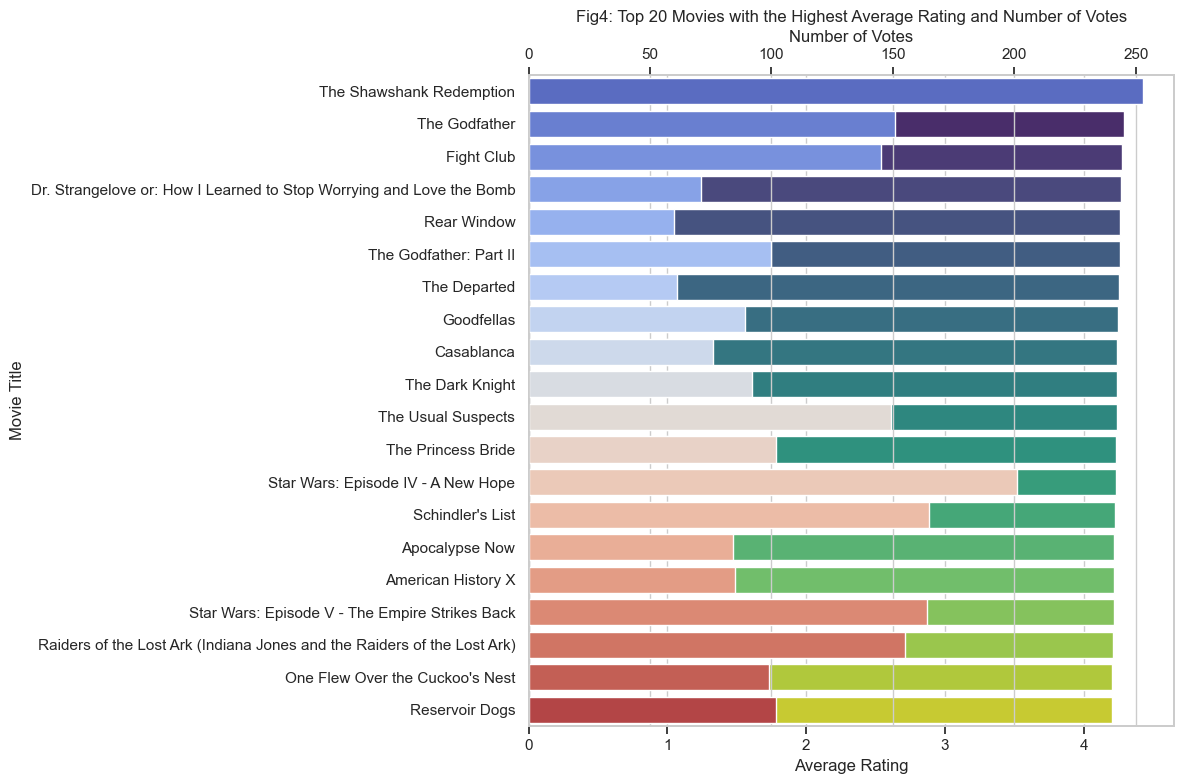

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# movies_cleaned_df, ratings_df

# Purpose: This chart aims to show the top 20 movies with the highest average rating and the number of votes they received.

# Calculate average ratings and number of votes for each rating category
# Group the ratings by 'movieId' and calculate the mean rating and the count of votes for each rating category.
ratings_summary = ratings_df.groupby('movieId').agg(
    average_rating=('rating', 'mean'),
    num_votes_5=('rating', lambda x: (x == 5).sum()),
    num_votes_4=('rating', lambda x: (x == 4).sum()),
    num_votes_3=('rating', lambda x: (x == 3).sum()),
    num_votes_2=('rating', lambda x: (x == 2).sum()),
    num_votes_1=('rating', lambda x: (x == 1).sum())
).reset_index()

# Merge with movie titles
# Combine the ratings summary with the movie titles to include the title information for each movie.
ratings_summary = pd.merge(ratings_summary, movies_cleaned_df[['movieId', 'title']], on='movieId')

# Filter movies with at least a minimum number of votes (e.g., 50 votes)
# Calculate the total number of votes for each movie and filter out movies with fewer than the minimum number of votes.
min_votes = 50
ratings_summary['total_votes'] = ratings_summary[['num_votes_5', 'num_votes_4', 'num_votes_3', 'num_votes_2', 'num_votes_1']].sum(axis=1)
filtered_ratings_summary = ratings_summary[ratings_summary['total_votes'] >= min_votes]

# Sort by average rating and select the top 20
# Sort the movies by their average rating in descending order and select the top 20 movies.
top_20_movies = filtered_ratings_summary.sort_values(by='average_rating', ascending=False).head(20)

# Set the style for seaborn
# This sets the visual style of the seaborn plots to 'whitegrid'.
sns.set(style="whitegrid")

# Create a figure and a set of subplots
# Create a figure with a specified size and a set of subplots.
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the average rating
# Create a bar plot to visualize the average rating for the top 20 movies.
sns.barplot(x='average_rating', y='title', data=top_20_movies, hue='title', palette='viridis', ax=ax1, dodge=False, legend=False)
ax1.set_title('Fig4: Top 20 Movies with the Highest Average Rating and Number of Votes')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Movie Title')

# Create a secondary y-axis to plot the number of votes
# Create a secondary y-axis to visualize the number of votes for the top 20 movies.
ax2 = ax1.twiny()
sns.barplot(x='total_votes', y='title', data=top_20_movies, hue='title', palette='coolwarm', ax=ax2, dodge=False, legend=False)
ax2.set_xlabel('Number of Votes')

# Adjust the layout to make room for the secondary y-axis
# Adjust the layout to ensure there is enough room for the secondary y-axis.
fig.tight_layout()

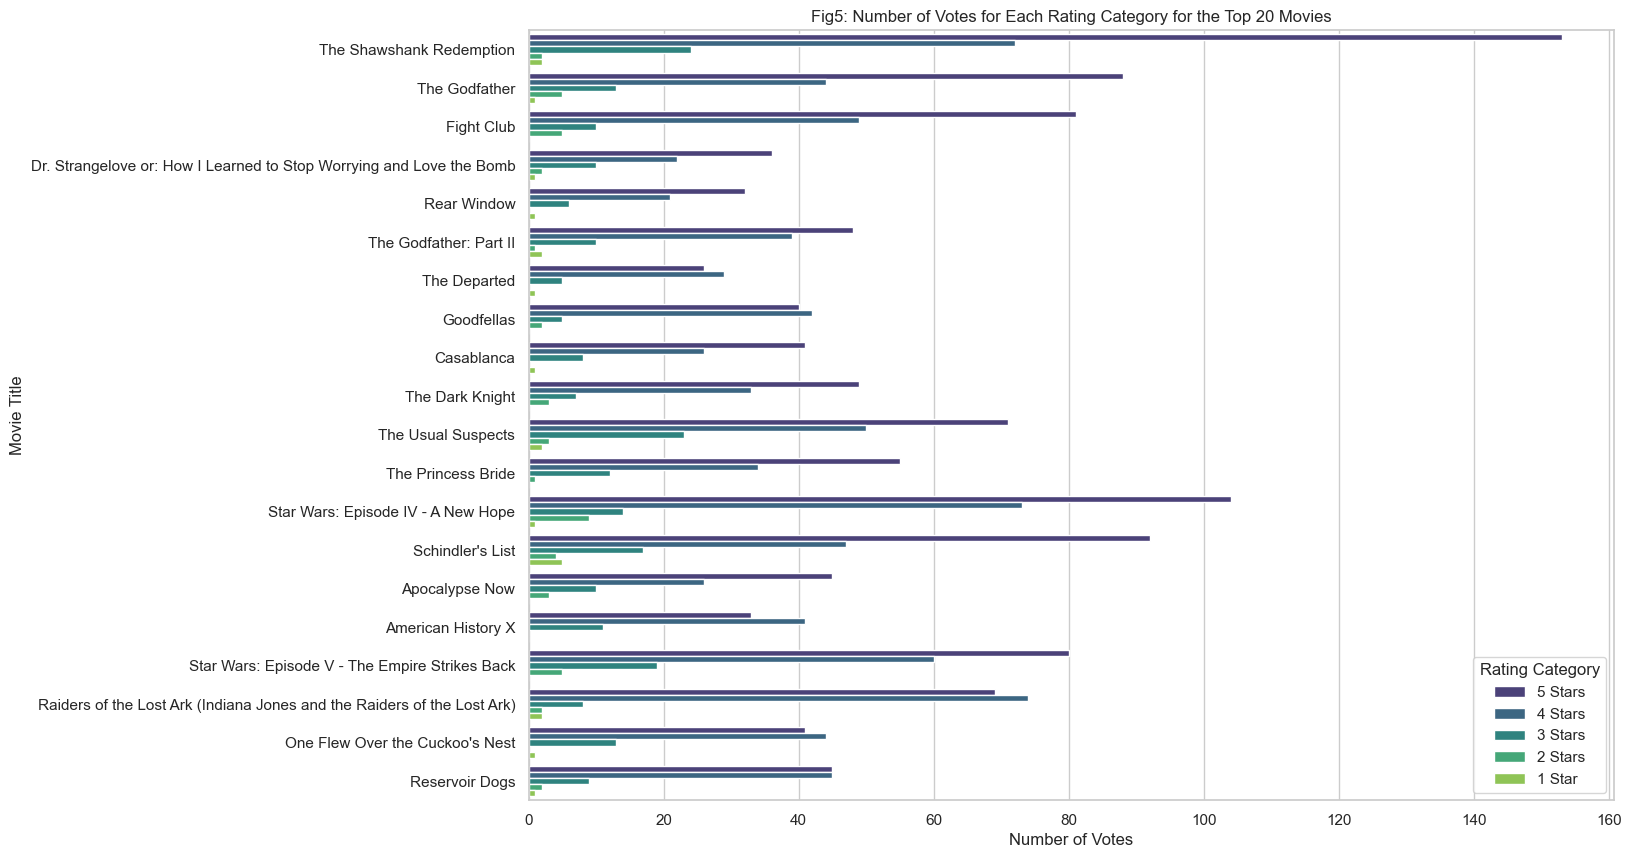

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Purpose: This chart aims to show the number of votes for each rating category (1 to 5 stars) for the top 20 movies.

# Display the number of votes for each rating category for the top 20 movies
# Melt the DataFrame to transform the number of votes for each rating category into a long format
top_20_movies_melted = top_20_movies.melt(id_vars=['movieId', 'title'], value_vars=['num_votes_5', 'num_votes_4', 'num_votes_3', 'num_votes_2', 'num_votes_1'], 
                                          var_name='rating_category', value_name='num_votes')

# Map rating categories to more readable format
# Create a dictionary to map the rating category column names to more readable labels
rating_category_map = {
    'num_votes_5': '5 Stars',
    'num_votes_4': '4 Stars',
    'num_votes_3': '3 Stars',
    'num_votes_2': '2 Stars',
    'num_votes_1': '1 Star'
}
# Apply the mapping to the 'rating_category' column
top_20_movies_melted['rating_category'] = top_20_movies_melted['rating_category'].map(rating_category_map)

# Set the style for seaborn
# This sets the visual style of the seaborn plots to 'whitegrid'.
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(14, 10))

# Create a bar plot to visualize the number of votes for each rating category for the top 20 movies
sns.barplot(x='num_votes', y='title', hue='rating_category', data=top_20_movies_melted, palette='viridis')

# Set the title of the plot
plt.title('Fig5: Number of Votes for Each Rating Category for the Top 20 Movies')

# Set the label for the x-axis
plt.xlabel('Number of Votes')

# Set the label for the y-axis
plt.ylabel('Movie Title')

# Set the legend title
plt.legend(title='Rating Category')

# Display the plot
plt.show()

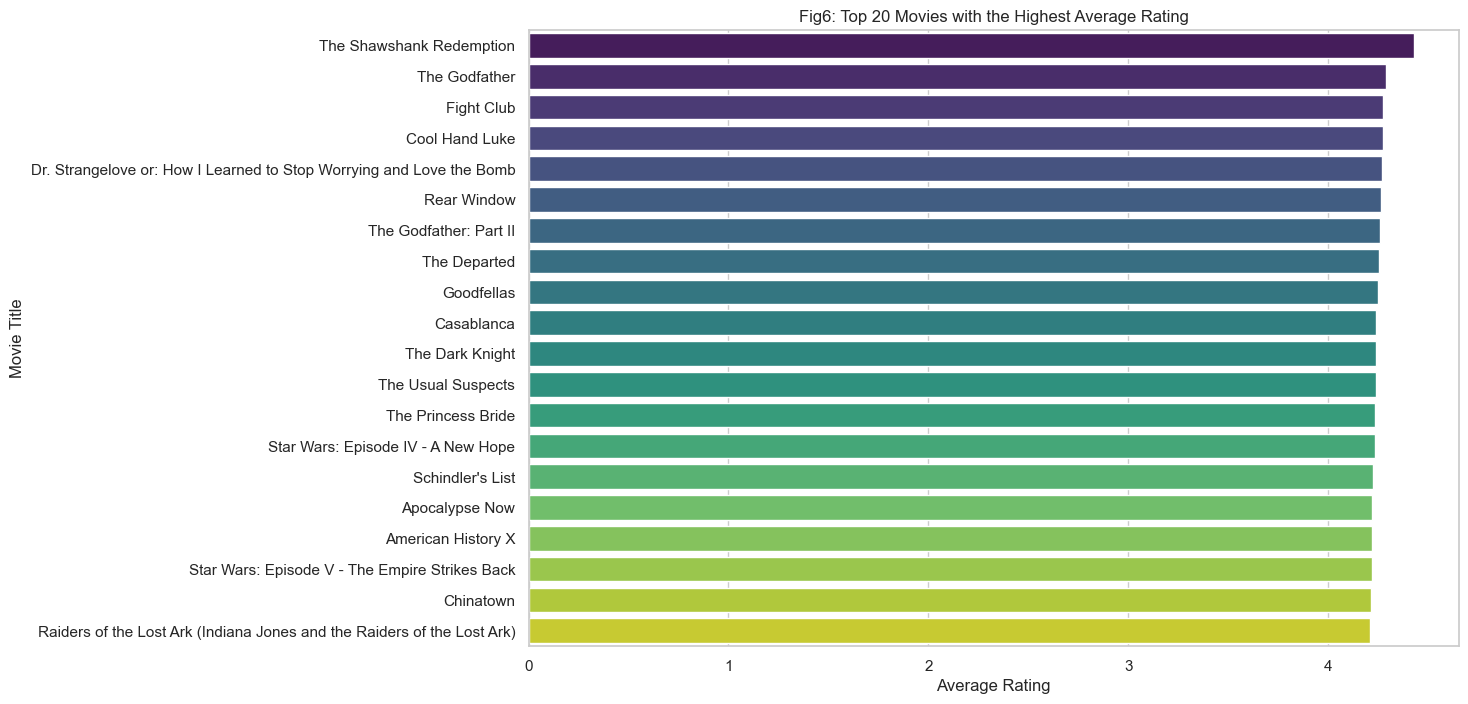

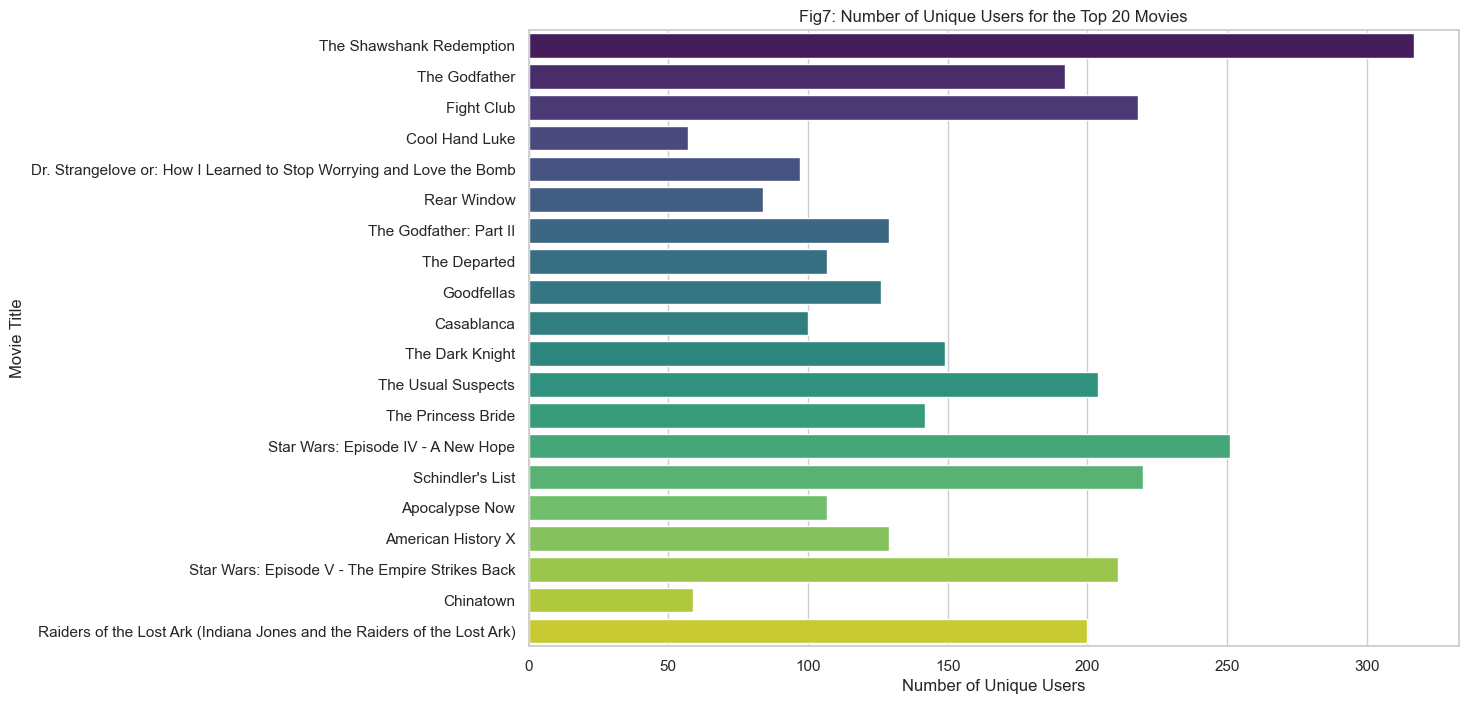

In [14]:
import matplotlib.pyplot as plt
"""
This script generates visualizations for the top 20 movies with the highest average ratings from a dataset of movie ratings.

The script performs the following steps:
1. Calculates the average ratings and the number of unique users for each movie.
2. Merges the ratings summary with movie titles.
3. Filters movies with at least a minimum number of votes (e.g., 50 votes).
4. Sorts the filtered movies by average rating and number of unique users, and selects the top 20 movies.
5. Creates a bar plot of the top 20 movies with the highest average rating.
6. Creates a bar plot displaying the number of unique users for each of the top 20 movies.

Dependencies:
- matplotlib
- seaborn
- pandas

Variables:
- ratings_df: DataFrame containing movie ratings with columns ['userId', 'movieId', 'rating'].
- movies_cleaned_df: DataFrame containing movie details with columns ['movieId', 'title'].
- min_votes: Minimum number of votes required for a movie to be considered (default is 50).
- ratings_summary: DataFrame containing the average rating and number of unique users for each movie.
- filtered_ratings_summary: DataFrame containing movies that meet the minimum votes criteria.
- top_20_movies: DataFrame containing the top 20 movies sorted by average rating and number of unique users.
"""
import seaborn as sns
import pandas as pd


# movies_cleaned_df, ratings_df

# Calculate average ratings and number of unique users
ratings_summary = ratings_df.groupby('movieId').agg(
    average_rating=('rating', 'mean'),
    num_users=('userId', 'nunique')
).reset_index()

# Merge with movie titles
ratings_summary = pd.merge(ratings_summary, movies_cleaned_df[['movieId', 'title']], on='movieId')

# Filter movies with at least a minimum number of votes (e.g., 50 votes)
min_votes = 50
filtered_ratings_summary = ratings_summary[ratings_summary['num_users'] >= min_votes]

# Sort by average rating and number of unique users, and select the top 20
top_20_movies = filtered_ratings_summary.sort_values(by=['average_rating', 'num_users'], ascending=False).head(20)

# Set the style for seaborn
sns.set(style="whitegrid")

# Bar plot of top 20 movies with the highest average rating
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y='title', data=top_20_movies, hue='title', palette='viridis', dodge=False, legend=False)
plt.title('Fig6: Top 20 Movies with the Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

# Display the number of unique users for each of the top 20 movies
plt.figure(figsize=(12, 8))
sns.barplot(x='num_users', y='title', data=top_20_movies, hue='title', palette='viridis', dodge=False, legend=False)
plt.title('Fig7: Number of Unique Users for the Top 20 Movies')
plt.xlabel('Number of Unique Users')
plt.ylabel('Movie Title')
plt.show()

In [15]:

# Clean the ratings data
def clean_ratings_data(df):
    # Convert the 'timestamp' column to a human-readable datetime format (optional)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    
    # Handle missing values if necessary (for this example, we assume there are no missing values)
    # df = df.dropna()  # Uncomment if you want to drop rows with missing values
    
    return df

# Apply the cleaning function to the ratings dataset
ratings_cleaned_df = clean_ratings_data(ratings_df)

# Verify the cleaned data
print(ratings_cleaned_df.head())
ratings_cleaned_df.info()

   userId  movieId  rating           timestamp
0       1        1     4.0 2000-07-30 18:45:03
1       1        3     4.0 2000-07-30 18:20:47
2       1        6     4.0 2000-07-30 18:37:04
3       1       47     5.0 2000-07-30 19:03:35
4       1       50     5.0 2000-07-30 18:48:51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


Made changes.


In [16]:
# Movie Recommendation System Using TF-IDF and Nearest Neighbors
# -------------------------------------------------------------
# This script provides a recommendation system for movies based on their features,
# utilizing TF-IDF (Term Frequency-Inverse Document Frequency) for text vectorization 
# and Nearest Neighbors for similarity detection. Given a movie title, the system 
# finds similar movies by combining genres, release decade, consolidated tags, and 
# average rating, and outputs the top recommendations sorted by rating.
#
# Dependencies:
# - pandas
# - sklearn.feature_extraction.text.TfidfVectorizer
# - sklearn.neighbors.NearestNeighbors
#
# Usage:
# - Call the get_recommendations function with a movie title to retrieve the 
#   top recommended movies based on similarity of features.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Step 1: Remove duplicates
# Drop duplicate rows based on 'title' and 'release_year' to avoid redundancy 
combined_df['release_decade'] = (combined_df['release_year'] // 10 * 10).astype('Int64').astype(str) + "s"

# Step 2: Create a release decade column
# Convert 'release_year' to 'release_decade' by grouping years into decades
# (e.g., 1990, 1991, ..., 1999 -> '1990s') to generalize the time-based information.
combined_df['combined_features'] = (
    combined_df['primary_genre'].fillna('') + " " +
    #combined_df['secondary_genre'].fillna('') + " " +
    combined_df['genres'].fillna('') + " " +
    combined_df['release_decade'].fillna('') + " " +
    combined_df['consolidated_tags'].fillna('') + " " +
    combined_df['average_rating'].fillna(0).astype(str)
)

# Step 4: Apply TF-IDF Vectorization
# Vectorize the 'combined_features' column using TF-IDF to transform text data into 
# numerical features that capture the relative importance of words. Stop words are 
# removed to reduce noise.
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(combined_df['combined_features'])


# Step 5: Initialize and train the Nearest Neighbors model
# Set up a Nearest Neighbors model with cosine similarity (measuring similarity 
# based on direction rather than magnitude) to find closest matches in the dataset.
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(tfidf_matrix)

def get_recommendations(title, df=combined_df, model=model, tfidf_matrix=tfidf_matrix):
    
    
    """
    Generate a list of top 10 movie recommendations based on a given movie title.
    
    Parameters:
    - title (str): The title of the movie for which recommendations are needed.
    - df (DataFrame): The dataset containing movie information.
    - model (NearestNeighbors): The fitted Nearest Neighbors model.
    - tfidf_matrix (sparse matrix): The TF-IDF matrix generated from movie features.

    Returns:
    - formatted_recommendations (list): A list of recommended movies with title, rating, 
      primary genre, and URLs (MovieLens, IMDb, TMDb), formatted as strings.
    """
    
    
    # Ensure the title exists in the dataset
    if title not in df['title'].values:
        return f"Movie title '{title}' not found in the dataset."

    # Get the index of the movie that matches the title
    idx = df[df['title'] == title].index[0]
    
    # Find similar movies
    distances, indices = model.kneighbors(tfidf_matrix[idx], n_neighbors=20)
    
    # Filter unique recommendations by title and sort by rating
    recommendations = (
        df.iloc[indices.flatten()[1:]]
        .drop_duplicates(subset='title')
        .sort_values(by='average_rating', ascending=False)  # Sort by rating
        .head(10)  # Limit to top 10 after sorting
    )

    # Format the recommendations list with title, rating, genre, and URLs
    formatted_recommendations = [
        f"{i+1}. {row[1]} (Rating: {row[2]:.2f}, Genre: {row[3]})\n"
        f"   MovieLens URL: {row[4]}\n"
        f"   IMDb URL: {row[5]}\n"
        f"   TMDb URL: {row[6]}"
        for i, row in enumerate(recommendations[['title', 'average_rating', 'primary_genre', 'movielens_url', 'imdb_url', 'tmdb_url']].itertuples())
    ]
    
    return formatted_recommendations



In [17]:
# Example: Get unique recommendations for "The Godfather"
chosen_movie = "The Godfather"
recommendations = get_recommendations(chosen_movie)

# Display the chosen movie and the recommendations
print(f"Recommendations for '{chosen_movie}':\n")
print("\n".join(recommendations))


Recommendations for 'The Godfather':

1. Sympathy for the Underdog (Rating: 4.50, Genre: Drama)
   MovieLens URL: https://movielens.org/movies/160527
   IMDb URL: http://www.imdb.com/title/tt0066806/
   TMDb URL: https://www.themoviedb.org/movie/90351
2. The Godfather: Part II (Rating: 4.26, Genre: Drama)
   MovieLens URL: https://movielens.org/movies/1221
   IMDb URL: http://www.imdb.com/title/tt0071562/
   TMDb URL: https://www.themoviedb.org/movie/240
3. Goodfellas (Rating: 4.25, Genre: Drama)
   MovieLens URL: https://movielens.org/movies/1213
   IMDb URL: http://www.imdb.com/title/tt0099685/
   TMDb URL: https://www.themoviedb.org/movie/769
4. Who'll Stop the Rain (Rating: 4.00, Genre: Drama)
   MovieLens URL: https://movielens.org/movies/4695
   IMDb URL: http://www.imdb.com/title/tt0078490/
   TMDb URL: https://www.themoviedb.org/movie/31941
5. Mean Streets (Rating: 4.00, Genre: Drama)
   MovieLens URL: https://movielens.org/movies/8042
   IMDb URL: http://www.imdb.com/title/tt0

In [18]:
# Example: Get unique recommendations for "Sabrina"
chosen_movie = "Sabrina"
recommendations = get_recommendations(chosen_movie)

# Display the chosen movie and the recommendations
print(f"Recommendations for '{chosen_movie}':\n")
print("\n".join(recommendations))

Recommendations for 'Sabrina':

1. Smiling Fish and Goat on Fire (Rating: 4.00, Genre: Romance)
   MovieLens URL: https://movielens.org/movies/3568
   IMDb URL: http://www.imdb.com/title/tt0162348/
   TMDb URL: https://www.themoviedb.org/movie/125537
2. Mallrats (Rating: 3.40, Genre: Romance)
   MovieLens URL: https://movielens.org/movies/180
   IMDb URL: http://www.imdb.com/title/tt0113749/
   TMDb URL: https://www.themoviedb.org/movie/2293
3. Jane Eyre (Rating: 3.19, Genre: Romance)
   MovieLens URL: https://movielens.org/movies/613
   IMDb URL: http://www.imdb.com/title/tt0116684/
   TMDb URL: https://www.themoviedb.org/movie/47333
4. Blame It on Rio (Rating: 3.19, Genre: Romance)
   MovieLens URL: https://movielens.org/movies/2259
   IMDb URL: http://www.imdb.com/title/tt0086973/
   TMDb URL: https://www.themoviedb.org/movie/14347
5. You've Got Mail (Rating: 3.12, Genre: Romance)
   MovieLens URL: https://movielens.org/movies/2424
   IMDb URL: http://www.imdb.com/title/tt0128853/
 

In [19]:
# Example: Get unique recommendations for "Toy Story"
chosen_movie = "Toy Story"
recommendations = get_recommendations(chosen_movie)

# Display the chosen movie and the recommendations
print(f"Recommendations for '{chosen_movie}':\n")
print("\n".join(recommendations))

Recommendations for 'Toy Story':

1. The Love Bug (Rating: 5.00, Genre: Fantasy)
   MovieLens URL: https://movielens.org/movies/150554
   IMDb URL: http://www.imdb.com/title/tt0119571/
   TMDb URL: https://www.themoviedb.org/movie/32643
2. Asterix and the Vikings (Astérix et les Vikings) (Rating: 5.00, Genre: Fantasy)
   MovieLens URL: https://movielens.org/movies/91355
   IMDb URL: http://www.imdb.com/title/tt0371552/
   TMDb URL: https://www.themoviedb.org/movie/9642
3. Casper Meets Wendy (Rating: 4.50, Genre: Fantasy)
   MovieLens URL: https://movielens.org/movies/42761
   IMDb URL: http://www.imdb.com/title/tt0140883/
   TMDb URL: https://www.themoviedb.org/movie/39345
4. Kubo and the Two Strings (Rating: 4.00, Genre: Fantasy)
   MovieLens URL: https://movielens.org/movies/162578
   IMDb URL: http://www.imdb.com/title/tt4302938/
   TMDb URL: https://www.themoviedb.org/movie/313297
5. Ponyo (Gake no ue no Ponyo) (Rating: 4.00, Genre: Fantasy)
   MovieLens URL: https://movielens.org/